#  **MY Project will follow this structure:**
*   Import Libraries & Load Dataste
*   EDA
*   Train-Test Split
*   Missing Value Handling
*   Outlier Handling
*   Feature Transformation
*   Encoding
*   Scaling
*   Model Training
*   Evaluation

> Import Libraries





In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import yeojohnson
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score



> Load Dataset



In [308]:
df = pd.read_csv('/content/sample_data/weatherAUS.csv')

# EDA

In [309]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [311]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [312]:
df.isna().sum().sort_values(ascending=False)

,0
Sunshine,69835
Evaporation,62790
Cloud3pm,59358
Cloud9am,55888
Pressure9am,15065
Pressure3pm,15028
WindDir9am,10566
WindGustDir,10326
WindGustSpeed,10263
Humidity3pm,4507




> # checking target distribution



In [313]:
print(df['RainTomorrow'].value_counts())

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='RainTomorrow'>

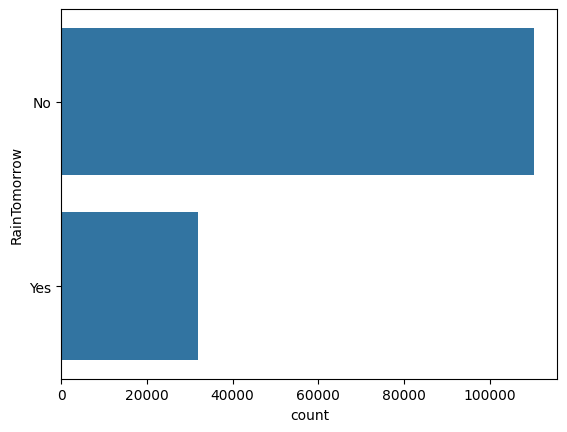

In [314]:
sns.countplot(df['RainTomorrow'])



> The target variable RainTomorrow shows moderate class imbalance (77.6% No vs 22.4% Yes).
Since the dataset is skewed toward the majority class, I will apply SMOTE on the training data to improve minority class representation and reduce model bias.



# Handling Missing Value

In [315]:
df.dropna(subset=['RainTomorrow'], inplace=True)

# split data to prevent data leakage
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

# Encode the target variable after splitting
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

In [316]:
num_cols = X_train.select_dtypes(include=np.number).columns
cat_cols = X_train.select_dtypes(exclude=np.number).columns
print(f'numerical columns:\n{num_cols}')
print(f'categorical columns:\n{cat_cols}')

numerical columns:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
categorical columns:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday'],
      dtype='object')


In [317]:
# impute numerical columns in train part
iter_imputer = IterativeImputer(max_iter=10, random_state=42)

X_train[num_cols] = iter_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = iter_imputer.transform(X_test[num_cols])

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [318]:
# fill categorical columns in train part
for col in cat_cols:
    if col != 'Date':  # skip Date for now -> i will use feature engineering -_-
        X_train[col].fillna(X_train[col].mode()[0], inplace=True)
        X_test[col].fillna(X_train[col].mode()[0], inplace=True)



/tmp/ipython-input-865035991.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mode()[0], inplace=True)
/tmp/ipython-input-865035991.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

## Feature Engineering for some cols



> Feature Engineering for Date column



In [319]:
# check dtype
X_train['Date'] = pd.to_datetime(X_train['Date'])
X_test['Date']  = pd.to_datetime(X_test['Date'])

In [320]:
# extract parts
for df_shadow in [X_train, X_test]:
    df_shadow['Year']  = df_shadow['Date'].dt.year
    df_shadow['Month'] = df_shadow['Date'].dt.month
    df_shadow['Day']   = df_shadow['Date'].dt.day

In [321]:
# Delete orignial col
X_train = X_train.drop('Date', axis=1)
X_test  = X_test.drop('Date', axis=1)

In [322]:
# season extract func
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3,4,5]:
        return 'Autumn'
    elif month in [6,7,8]:
        return 'Winter'
    else:
        return 'Spring'

In [323]:
# applay func on dataframe
for df_shadow in [X_train, X_test]:
    df_shadow['Season'] = df_shadow['Month'].apply(get_season)



> for Temp Range


*   Temp Range = Max - Min




In [324]:
for df_shadow in [X_train, X_test]:
    df_shadow['TempRange'] = df_shadow['MaxTemp'] - df_shadow['MinTemp']



> Average Wind Speed



In [325]:
for df_shadow in [X_train, X_test]:
    df_shadow['AvgWindSpeed'] = (df_shadow['WindSpeed9am'] + df_shadow['WindSpeed3pm']) / 2



> Cloud & Temp Diff



In [326]:
for df_shadow in [X_train, X_test]:
    df_shadow['CloudDiff'] = df_shadow['Cloud3pm'] - df_shadow['Cloud9am']
    df_shadow['TempDiff']  = df_shadow['Temp3pm'] - df_shadow['Temp9am']

In [327]:
# check before continue --_--
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm,RainToday,Year,Month,Day,Season,TempRange,AvgWindSpeed,CloudDiff,TempDiff
10523,CoffsHarbour,16.3,24.3,15.8,6.600000,6.242634,SSE,43.00000,WSW,SSE,...,24.1,Yes,2013,4,4,Autumn,8.0,21.5,-2.000000,7.2
60652,Bendigo,21.9,42.3,0.0,13.086291,13.052538,W,80.00000,E,WNW,...,41.3,No,2016,1,13,Summer,20.4,23.0,0.934651,12.3
118155,PerthAirport,8.0,20.6,0.0,2.800000,3.900000,W,39.81722,ENE,ENE,...,19.1,No,2010,6,11,Winter,12.6,16.0,1.000000,8.2
43709,Wollongong,16.0,20.4,8.2,5.670944,4.707742,S,63.00000,SSW,SW,...,15.6,Yes,2012,3,7,Autumn,4.4,29.5,7.000000,-1.8
36536,WaggaWagga,14.5,30.4,0.0,17.000000,12.900000,W,54.00000,WSW,WSW,...,28.5,No,2009,1,8,Summer,15.9,23.5,-1.000000,9.6


In [328]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


# Handling Outliers with IQR

In [329]:
num_cols = X_train.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply Capping
    X_train[col] = X_train[col].clip(lower=lower_bound, upper=upper_bound)
    X_test[col]  = X_test[col].clip(lower=lower_bound, upper=upper_bound)

print("NaN in X_train:", X_train.isnull().sum().sum())
print("NaN in X_test: ", X_test.isnull().sum().sum())


NaN in X_train: 0
NaN in X_test:  0


# Handle Skewness

In [330]:
# check skewness for each col
skewness = X_train[num_cols].skew().sort_values(ascending=False)
print(skewness)

Rainfall         1.201982
WindGustSpeed    0.584370
Evaporation      0.563316
WindSpeed9am     0.504239
TempRange        0.444294
AvgWindSpeed     0.439034
WindSpeed3pm     0.401888
TempDiff         0.275616
Temp3pm          0.241253
MaxTemp          0.234428
Temp9am          0.088017
CloudDiff        0.053394
Month            0.027423
MinTemp          0.024620
Humidity3pm      0.024219
Day              0.010381
Pressure3pm     -0.002026
Pressure9am     -0.025854
Year            -0.041809
Cloud3pm        -0.138482
Cloud9am        -0.172630
Sunshine        -0.301876
Humidity9am     -0.435707
dtype: float64


In [331]:
# Rainfall -> highly skewed
# yeojohnson -> pervent negative errors that be nan
X_train['Rainfall'], _ = yeojohnson(X_train['Rainfall'])
X_test['Rainfall'], _  = yeojohnson(X_test['Rainfall'])

In [332]:
print("NaN in X_train:", X_train.isnull().sum().sum())
print("NaN in X_test: ", X_test.isnull().sum().sum())

NaN in X_train: 0
NaN in X_test:  0


# Encoding Categorical Variables

In [333]:
cat_cols = X_train.select_dtypes(exclude=np.number).columns
print(cat_cols)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'Season'],
      dtype='object')


In [334]:
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])
    label_encoders[col] = le

In [335]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106644 entries, 10523 to 122308
Data columns (total 29 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       106644 non-null  int64  
 1   MinTemp        106644 non-null  float64
 2   MaxTemp        106644 non-null  float64
 3   Rainfall       106644 non-null  float64
 4   Evaporation    106644 non-null  float64
 5   Sunshine       106644 non-null  float64
 6   WindGustDir    106644 non-null  int64  
 7   WindGustSpeed  106644 non-null  float64
 8   WindDir9am     106644 non-null  int64  
 9   WindDir3pm     106644 non-null  int64  
 10  WindSpeed9am   106644 non-null  float64
 11  WindSpeed3pm   106644 non-null  float64
 12  Humidity9am    106644 non-null  float64
 13  Humidity3pm    106644 non-null  float64
 14  Pressure9am    106644 non-null  float64
 15  Pressure3pm    106644 non-null  float64
 16  Cloud9am       106644 non-null  float64
 17  Cloud3pm       106644 non-null

# Scaling


In [336]:
num_cols = X_train.columns  # all columns became numerical after encoding

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]),
                              index=X_train.index,
                              columns=num_cols)

X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]),
                             index=X_test.index,
                             columns=num_cols)

In [337]:
#check
print(X_train_scaled.describe().T[['mean', 'std']].round(2))

               mean  std
Location       -0.0  1.0
MinTemp        -0.0  1.0
MaxTemp        -0.0  1.0
Rainfall       -0.0  1.0
Evaporation    -0.0  1.0
Sunshine        0.0  1.0
WindGustDir    -0.0  1.0
WindGustSpeed  -0.0  1.0
WindDir9am      0.0  1.0
WindDir3pm      0.0  1.0
WindSpeed9am   -0.0  1.0
WindSpeed3pm    0.0  1.0
Humidity9am     0.0  1.0
Humidity3pm    -0.0  1.0
Pressure9am    -0.0  1.0
Pressure3pm     0.0  1.0
Cloud9am       -0.0  1.0
Cloud3pm       -0.0  1.0
Temp9am         0.0  1.0
Temp3pm        -0.0  1.0
RainToday      -0.0  1.0
Year           -0.0  1.0
Month          -0.0  1.0
Day            -0.0  1.0
Season         -0.0  1.0
TempRange      -0.0  1.0
AvgWindSpeed    0.0  1.0
CloudDiff       0.0  1.0
TempDiff       -0.0  1.0


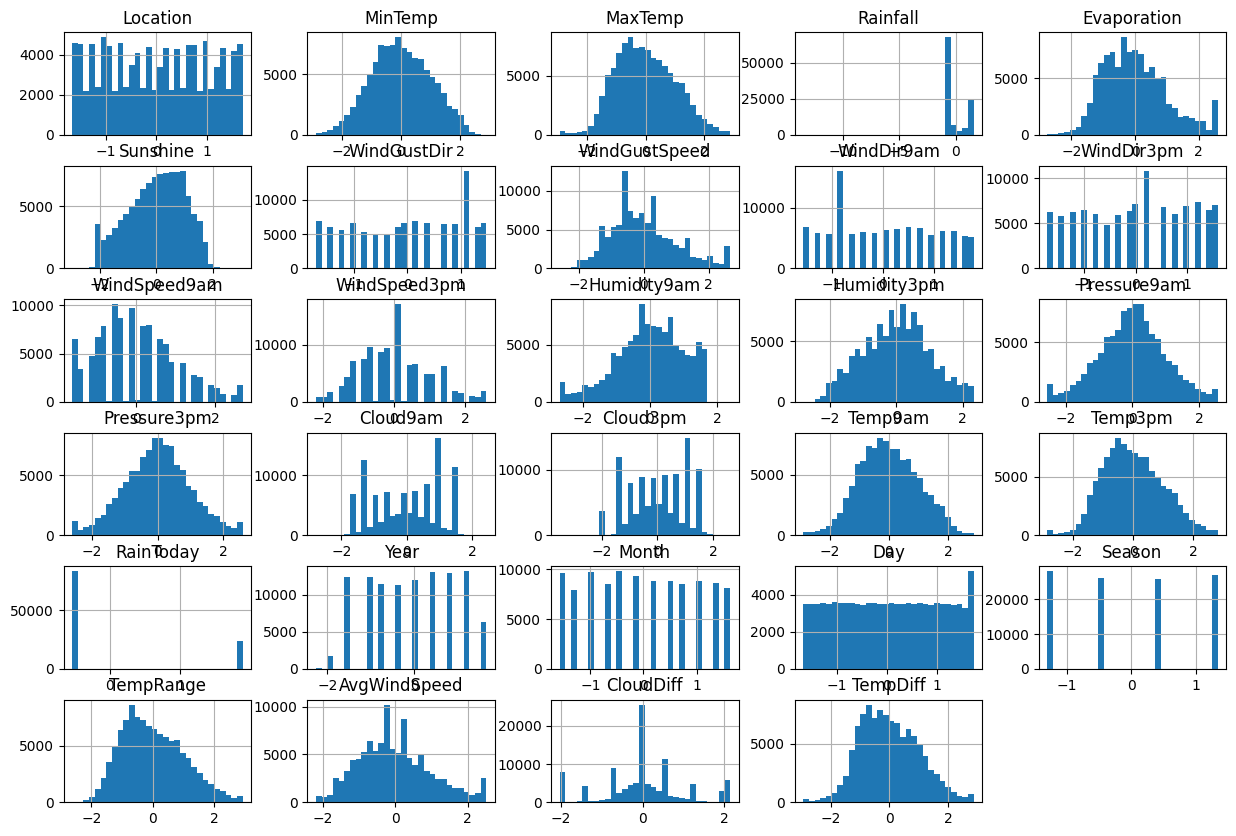

In [338]:
#check distribution
import matplotlib.pyplot as plt

X_train_scaled.hist(figsize=(15,10), bins=30)
plt.show()

# Handling Class Imbalance

In [339]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106644 entries, 10523 to 122308
Data columns (total 29 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       106644 non-null  float64
 1   MinTemp        106644 non-null  float64
 2   MaxTemp        106644 non-null  float64
 3   Rainfall       106644 non-null  float64
 4   Evaporation    106644 non-null  float64
 5   Sunshine       106644 non-null  float64
 6   WindGustDir    106644 non-null  float64
 7   WindGustSpeed  106644 non-null  float64
 8   WindDir9am     106644 non-null  float64
 9   WindDir3pm     106644 non-null  float64
 10  WindSpeed9am   106644 non-null  float64
 11  WindSpeed3pm   106644 non-null  float64
 12  Humidity9am    106644 non-null  float64
 13  Humidity3pm    106644 non-null  float64
 14  Pressure9am    106644 non-null  float64
 15  Pressure3pm    106644 non-null  float64
 16  Cloud9am       106644 non-null  float64
 17  Cloud3pm       106644 non-null

In [340]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)



---


# Addition ML Model + Evaluation -_-

In [347]:
# try random forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
# fitting
rf_model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', n_estimators=500, n_jobs=-1,
                       random_state=42)

In [348]:
# prediction
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:,1]  # prob of Yes

Accuracy: 0.845452755351768


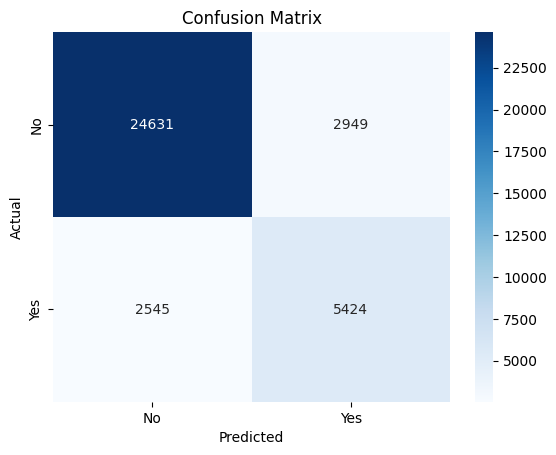

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     27580
           1       0.65      0.68      0.66      7969

    accuracy                           0.85     35549
   macro avg       0.78      0.79      0.78     35549
weighted avg       0.85      0.85      0.85     35549

ROC-AUC: 0.8882672417801724


In [352]:
# Evaluation
# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
roc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc)